<center>
<h1>Homework Assignment 3</h1>
<br>
<h2>Predictive Analytics using Python (CIS432)</h2>
<h3>Simon Business School</h3>
<h3>Due date: 1/23/2018 23:55</h3>
</center> 

### Submission Instructions
1. Each student should submit an individual homework assignment.
2. Discussing solutions with others is allowed.
3. Copying solutions is prohibited.
4. Late submissions will not be accepted.
5. Write your solutions in Jupyter IPython notebooks. Use markdown cells to format your document. Your solutions should be replicable, as it will be executed on the grader's computer.
6. Solution files should be uploaded to Blackboard.

# Name： Yaruo Zhang

# (1) json and web-services
In this exercise, you will use the open database <a>opencorporates.com</a> to create a DataFrame holding information about companies. Search the words "mckinsey company" and  based on the results, create a DataFrame that contains companies numbers, companies names, country and localty using the corresponding attributes from the database API (see the inclass example).

In [1]:
import json
import pandas as pd
import requests
import sqlite3
import re
from bs4 import BeautifulSoup
import numpy as np

In [61]:
file = requests.get('https://api.opencorporates.com/v0.4/companies/search?q=mckinsey+company')

In [62]:
file.text

'{"error":{"message":"Rate limit exceeded"}}'

In [16]:
%store file.text > mckinsey.txt
!cat mckinsey.txt

Writing 'file.text' (str) to file 'mckinsey.txt'.
{"api_version":"0.4","results":{"companies":[{"company":{"name":"\"McKinsey & Company, Inc. Sweden (USA) svensk filial\"","company_number":"516402-1072","jurisdiction_code":"se","incorporation_date":null,"dissolution_date":null,"company_type":null,"registry_url":null,"branch":"F","branch_status":"branch of an out-of-jurisdiction company","inactive":null,"current_status":null,"created_at":"2013-03-14T01:23:36+00:00","updated_at":"2017-07-15T19:19:29+00:00","retrieved_at":"2017-07-13T21:44:40+00:00","opencorporates_url":"https://opencorporates.com/companies/se/516402-1072","previous_names":[],"source":{"publisher":"Bolagsverket (Swedish Companies Registration Office)","url":"http://www.bolagsverket.se/","retrieved_at":"2017-07-13T21:44:40+00:00"},"registered_address":null,"registered_address_in_full":null,"restricted_for_marketing":null,"native_company_number":null}},{"company":{"name":"08271775 LTD","company_number":"08271775","jurisdict

In [18]:
data = json.loads(file.text)
data.keys()

dict_keys(['api_version', 'results'])

In [21]:
data['results']['companies']

[{'company': {'branch': 'F',
   'branch_status': 'branch of an out-of-jurisdiction company',
   'company_number': '516402-1072',
   'company_type': None,
   'created_at': '2013-03-14T01:23:36+00:00',
   'current_status': None,
   'dissolution_date': None,
   'inactive': None,
   'incorporation_date': None,
   'jurisdiction_code': 'se',
   'name': '"McKinsey & Company, Inc. Sweden (USA) svensk filial"',
   'native_company_number': None,
   'opencorporates_url': 'https://opencorporates.com/companies/se/516402-1072',
   'previous_names': [],
   'registered_address': None,
   'registered_address_in_full': None,
   'registry_url': None,
   'restricted_for_marketing': None,
   'retrieved_at': '2017-07-13T21:44:40+00:00',
   'source': {'publisher': 'Bolagsverket (Swedish Companies Registration Office)',
    'retrieved_at': '2017-07-13T21:44:40+00:00',
    'url': 'http://www.bolagsverket.se/'},
   'updated_at': '2017-07-15T19:19:29+00:00'}},
 {'company': {'branch': None,
   'branch_status': No

In [32]:
data['results']['page']

1

In [25]:
#companies numbers, companies names, country and localty
counter = 0
pages_number = data['results']['total_pages']
pages_number

7

In [20]:

numberl, namel, countryl, localtyl = [[] for i in range(4)]

for i in range(1,8):
    data_page = requests.get('https://api.opencorporates.com/v0.4/companies/search?q=mckinsey+company&page=%d'%i)
    data_page = json.loads(data_page.text)
    for c in data_page['results']['companies']:
        number= c['company']['company_number']
        name= c['company']['name']
        try:
            country= c['company']['registered_address']['country']
            localty= c['company']['registered_address']['locality']
        except TypeError:
            country='NaN'
            localty='NaN'
        numberl.append(number)
        namel.append(name)
        countryl.append(country)
        localtyl.append(localty)

d = {'number':number, 'name':namel, 'country': countryl, 'localty': localty}
df = pd.DataFrame(data=d)
df

,country,localty,name,number
0,NaN,None,"""McKinsey & Company, Inc. Sweden (USA) svensk ...",B01218522012
1,England,None,08271775 LTD,B01218522012
2,United Kingdom,None,BERKELEY MCKINSEY & COMPANY LTD,B01218522012
3,United States,None,EVANS-MCKINSEY & COMPANY,B01218522012
4,United States,None,"GARY MCKINSEY & COMPANY, INC.",B01218522012
5,United States,None,"GEOFFREY, MORGAN, MCKINSEY & COMPANY, INC.",B01218522012
6,India,None,MCKINSEY & CO. INC,B01218522012
7,Canada,None,MCKINSEY & COMPAGNIE CANADA,B01218522012
8,NaN,None,"MCKINSEY & COMPANY (AZERBAIJAN), INC.",B01218522012
9,Thailand,None,"MCKINSEY & COMPANY (THAILAND) CO.,LTD.",B01218522012


In [17]:
%cd mckinsey_company_page_1/
file=!ls

[WinError 2] The system cannot find the file specified: 'mckinsey_company_page_1/'
C:\Users\yaruo\Homework


# (2) Databases and sql
The file "pageviews" contains a table with 4 columns.
1. Load the data file into a table in the empty database "empty_db.sqlite".
2. Write and execute a sql query that computes the sum of the third column of the newly created table.

In [2]:
# write solution here
!pwd

C:\Users\yaruo\Homework


In [3]:
pd.read_csv('pageviews', sep=' ', encoding='utf8').head()

,aa,Main_Page,1,0
0,aa.d,Main_Page,1,0
1,aa.m,Main_Page,1,0
2,ab,1942,1,0
3,ab,1990,1,0
4,ab,2007,1,0


In [4]:
con = sqlite3.connect('empty_db.sqlite')
con.execute("CREATE TABLE tbl(col1 TEXT, col2 TEXT, col3 INTEGER, col4 INTEGER);")
con.commit()
con.close()

OperationalError: table tbl already exists

In [5]:
import csv
con = sqlite3.connect('empty_db.sqlite')
csvfile = open('pageviews', encoding='utf8')                        
csvReader = csv.reader(csvfile,delimiter=' ')                              
header = next(csvReader)                                     # skip first row (header)
for rec in csvReader:                                        # iterate over the other rows
    con.execute("INSERT INTO tbl VALUES %s"%str(tuple(rec))) # add record to the table tbl in the database
csvfile.close() 
con.commit()                                                 # commit
con.close()                                                  # close connection

In [8]:
con1 = sqlite3.connect('empty_db.sqlite')
df = pd.read_sql_query("SELECT * FROM tbl", con1)
con1.close()
df

,col1,col2,col3,col4
0,aa.d,Main_Page,1,0
1,aa.m,Main_Page,1,0
2,ab,1942,1,0
3,ab,1990,1,0
4,ab,2007,1,0
5,ab,2011,2,0
6,ab,2012,2,0
7,ab,2016,1,0
8,ab,Авикипедиа:Афорум,1,0
9,ab,Авикипедиа:Описание,2,0


In [10]:
con2 = sqlite3.connect('empty_db.sqlite')
df1 = pd.read_sql_query("""SELECT sum(col3) 
                            FROM tbl""", con2)
con2.close()
df1.head()

,sum(col3)
0,466114


# (3) Web-scraping

HTML are XML documents that specify the content and design of web-pages. For example, the file html_example.txt contains the HTML representation of the following table: 

| A | B | C |
|---|---|---|
| D | E | F |


In [4]:
!cat html_example.txt

<TABLE>
    <TR>
        <TD>A</TD>
        <TD>B</TD>
        <TD>C</TD>
    </TR>
    <TR>
        <TD>D</TD>
        <TD>E</TD>
        <TD>F</TD>
    </TR>
</TABLE>


The TABLE element is used to indicate the beginning of the table, TR elements indicate beginning of rows, and TD elements indicate beginning of columns. The text that appears between the TD tags specifies cells content. 

As another example, hyperlinks are specified using the A tag. That is, for a link to the website "http://www.w3schools.com" whose label in a webpage is "Visit W3Schools.com", there is a corresponding A element (that is, an element whose tag is A). The file html_example2.txt contains the HTML specification for this link:

In [5]:
!cat html_example2.txt

<a href="http://www.w3schools.com">Visit W3Schools.com!</a> 


Pick a Wikipedia article of your choice. 
1. Print all hyperlinks appearing your article (links to other websites or wikipedia pages)
2. Print a list with Wikipedia articles referenced from your chosen article
3. Choose a webpage (not necessarily in Wikipedia) that contains tabular information. Write code that reads the webpage and creates a DataFrame, which contains that table.

In [6]:
# write solution here

In [80]:
#1:I take wiki of recent Marvel movie Black Panther as an example:

from urllib.request import urlopen
from bs4 import BeautifulSoup as BS

html = urlopen('https://en.wikipedia.org/wiki/Black_Panther_(film)')
html2 = BS(html, 'html.parser')
t1 = html2.find_all('a')
links=[]
for t2 in t1:
    t3 = t2.get('href')
    if t3 != None:
        links.append(t3)
        print(t3)

#mw-head
#p-search
/wiki/The_Black_Panther_(1921_film)
/wiki/The_Black_Panther_(1977_film)
/wiki/File:Black_Panther_film_poster.jpg
/wiki/Ryan_Coogler
/wiki/Kevin_Feige
/wiki/Black_Panther_(comics)
/wiki/Stan_Lee
/wiki/Jack_Kirby
/wiki/Chadwick_Boseman
/wiki/Michael_B._Jordan
/wiki/Lupita_Nyong%27o
/wiki/Danai_Gurira
/wiki/Martin_Freeman
/wiki/Daniel_Kaluuya
/wiki/Letitia_Wright
/wiki/Winston_Duke
/wiki/Angela_Bassett
/wiki/Forest_Whitaker
/wiki/Andy_Serkis
/wiki/Ludwig_G%C3%B6ransson
/wiki/Rachel_Morrison
#cite_note-MarvelProductionBegins-1
#cite_note-MarvelProductionBegins-1
/wiki/Marvel_Studios
/wiki/Walt_Disney_Studios_Motion_Pictures
#cite_note-USATodayJan2018-2
/wiki/Superhero_film
/wiki/Marvel_Comics
/wiki/Black_Panther_(comics)
/wiki/Marvel_Studios
/wiki/Walt_Disney_Studios_Motion_Pictures
/wiki/List_of_Marvel_Cinematic_Universe_films
/wiki/Marvel_Cinematic_Universe
/wiki/Ryan_Coogler
/wiki/Chadwick_Boseman
/wiki/Michael_B._Jordan
/wiki/Lupita_Nyong%27o
/wiki/Danai_Gurira
/wiki

https://www.webcitation.org/6eVvr4Ls7?url=http://www.comicbookresources.com/article/coogler-calls-black-panther-a-personal-project
#cite_ref-BeachlerMorrison_91-0
#cite_ref-BeachlerMorrison_91-1
http://variety.com/2016/artisans/production/black-panther-moonlight-production-designer-1201929238/
/wiki/Variety_(magazine)
https://www.webcitation.org/6mQppfQsh?url=http://variety.com/2016/artisans/production/black-panther-moonlight-production-designer-1201929238/
#cite_ref-VultureApril2017_92-0
#cite_ref-VultureApril2017_92-1
#cite_ref-VultureApril2017_92-2
#cite_ref-VultureApril2017_92-3
http://www.vulture.com/2017/04/black-panther-looks-like-a-stunning-spin-on-superhero-movies.html
/wiki/Vulture_(blog)
https://www.webcitation.org/6pp6il0Fw?url=http://www.vulture.com/2017/04/black-panther-looks-like-a-stunning-spin-on-superhero-movies.html
#cite_ref-CooglerDraft_93-0
http://collider.com/black-panther-movie-ryan-coogler-script-filming-dates/
/wiki/Collider.com
https://www.webcitation.org/6gh

In [43]:
links

[None,
 '#mw-head',
 '#p-search',
 '/wiki/The_Black_Panther_(1921_film)',
 '/wiki/The_Black_Panther_(1977_film)',
 '/wiki/File:Black_Panther_film_poster.jpg',
 '/wiki/Ryan_Coogler',
 '/wiki/Kevin_Feige',
 '/wiki/Black_Panther_(comics)',
 '/wiki/Stan_Lee',
 '/wiki/Jack_Kirby',
 '/wiki/Chadwick_Boseman',
 '/wiki/Michael_B._Jordan',
 '/wiki/Lupita_Nyong%27o',
 '/wiki/Danai_Gurira',
 '/wiki/Martin_Freeman',
 '/wiki/Daniel_Kaluuya',
 '/wiki/Letitia_Wright',
 '/wiki/Winston_Duke',
 '/wiki/Angela_Bassett',
 '/wiki/Forest_Whitaker',
 '/wiki/Andy_Serkis',
 '/wiki/Ludwig_G%C3%B6ransson',
 '/wiki/Rachel_Morrison',
 '#cite_note-MarvelProductionBegins-1',
 '#cite_note-MarvelProductionBegins-1',
 '/wiki/Marvel_Studios',
 '/wiki/Walt_Disney_Studios_Motion_Pictures',
 '#cite_note-USATodayJan2018-2',
 '/wiki/Superhero_film',
 '/wiki/Marvel_Comics',
 '/wiki/Black_Panther_(comics)',
 '/wiki/Marvel_Studios',
 '/wiki/Walt_Disney_Studios_Motion_Pictures',
 '/wiki/List_of_Marvel_Cinematic_Universe_films',
 '

In [81]:
#2:

for link in links:
    if link.startswith('/wiki'):
        print(link)

/wiki/The_Black_Panther_(1921_film)
/wiki/The_Black_Panther_(1977_film)
/wiki/File:Black_Panther_film_poster.jpg
/wiki/Ryan_Coogler
/wiki/Kevin_Feige
/wiki/Black_Panther_(comics)
/wiki/Stan_Lee
/wiki/Jack_Kirby
/wiki/Chadwick_Boseman
/wiki/Michael_B._Jordan
/wiki/Lupita_Nyong%27o
/wiki/Danai_Gurira
/wiki/Martin_Freeman
/wiki/Daniel_Kaluuya
/wiki/Letitia_Wright
/wiki/Winston_Duke
/wiki/Angela_Bassett
/wiki/Forest_Whitaker
/wiki/Andy_Serkis
/wiki/Ludwig_G%C3%B6ransson
/wiki/Rachel_Morrison
/wiki/Marvel_Studios
/wiki/Walt_Disney_Studios_Motion_Pictures
/wiki/Superhero_film
/wiki/Marvel_Comics
/wiki/Black_Panther_(comics)
/wiki/Marvel_Studios
/wiki/Walt_Disney_Studios_Motion_Pictures
/wiki/List_of_Marvel_Cinematic_Universe_films
/wiki/Marvel_Cinematic_Universe
/wiki/Ryan_Coogler
/wiki/Chadwick_Boseman
/wiki/Michael_B._Jordan
/wiki/Lupita_Nyong%27o
/wiki/Danai_Gurira
/wiki/Martin_Freeman
/wiki/Daniel_Kaluuya
/wiki/Letitia_Wright
/wiki/Winston_Duke
/wiki/Angela_Bassett
/wiki/Forest_Whitaker


In [16]:
#3:I tried two methods to demonstrate table both in English and Chinese
from lxml import html
from lxml import etree
page3 = requests.get('https://en.wikipedia.org/wiki/Iron_Man')
tree = html.fromstring(page3.content)

In [69]:
page_table = requests.get('https://en.wikipedia.org/wiki/Iron_Man_(2008_film)')
tree = html.fromstring(page_table.content)
tables = tree.xpath('.//table')
accolades=tables[1]
accolades
print(etree.tostring(accolades, encoding='utf8', pretty_print=True))


b'<table class="wikitable plainrowheaders sortable" style="width: 99%;">\n<tr>\n<th scope="col">Year</th>\n<th scope="col">Award</th>\n<th scope="col">Category</th>\n<th scope="col">Recipient(s)</th>\n<th scope="col">Result</th>\n<th scope="col" class="unsortable"><abbr title="Reference(s)">Ref(s)</abbr></th>\n</tr>\n<tr>\n<td rowspan="6">2008</td>\n<td><a href="/wiki/2008_MTV_Movie_Awards" title="2008 MTV Movie Awards">MTV Movie Awards</a></td>\n<td>Best Summer Movie So Far</td>\n<td><i>Iron Man</i></td>\n<td style="background: #99FF99; color: black; vertical-align: middle; text-align: center;" class="yes table-yes2">Won</td>\n<td><sup id="cite_ref-MTVAwards08_117-0" class="reference"><a href="#cite_note-MTVAwards08-117">[117]</a></sup></td>\n</tr>\n<tr>\n<td rowspan="4"><a href="/wiki/2008_Teen_Choice_Awards" title="2008 Teen Choice Awards">Teen Choice Awards</a></td>\n<td><a href="/wiki/Teen_Choice_Award_for_Choice_Movie_%E2%80%93_Action" title="Teen Choice Award for Choice Movie \x

In [70]:
rows_parsed = []
for row_ele in accolades:
    row = []
    for col_ele in row_ele:
        cell_content = col_ele.text_content() 
        row.append(cell_content)
    rows_parsed.append(row)

In [71]:
df= pd.DataFrame(rows_parsed)
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header
df.head()

,Year,Award,Category,Recipient(s),Result,Ref(s)
1,2008,MTV Movie Awards,Best Summer Movie So Far,Iron Man,Won,[117]
2,Teen Choice Awards,Choice Movie: Action,Iron Man,Nominated,[118],None
3,Choice Movie Actor: Action,Robert Downey Jr.,Nominated,None,None,None
4,Choice Movie Actress: Action,Gwyneth Paltrow,Nominated,None,None,None
5,Choice Movie: Villain,Jeff Bridges,Nominated,None,None,None


In [2]:
#3:
url='http://hz.house.ifeng.com/detail/2014_10_28/50087618_1.shtml'
d=pd.read_html(url)[0]

In [10]:
df = pd.DataFrame(data=d)
new_header = df.iloc[1]
df = df[2:]
df.columns = new_header
df.head()

1,序号,楼盘名称,城区,签约套数,预定套数,签约面积（㎡）,签约均价（元/㎡）
2,1,龙湖春江郦城,滨江,18,0,2178.61,23757
3,2,海威钱塘之星,滨江,13,0,629.55㎡,17398
4,3,大家运河之星,拱墅,12,0,1052.72㎡,10457
5,4,保利城市果岭,下沙,8,0,743.05㎡,10457
6,5,金地格林格林,江干,7,8,609.97㎡,10238


# (4) numpy, pandas, visualization

In this assignment, you will analyze 5 files (included in the folder "online learning") that contain information about times at which students watched online lectures. The file name represent the topic of each lecture, and the columns within each file contain the following information: 
* Timestamp - The time at which the user started watching the lecture (e.g., 11/9/2017 8:26:44 PM)
* Start Position - The position relative to the beginning of the lecture in seconds (e.g., 15.25 implies that the student started watching 15.25 seconds after the beginning of the lecture)
* Minutes Viewed - The number of minutes viewed since 'Timestamp'
* UserID - a unique user identifier

Note that each user can move backward and forward in time, in which case multiple records will be added to the data file. We will refer to each time interval/record as a 'stretch'.

Write Jupyter notebook to performs the following basic analysis:
1. Create a list containing the names of the text files in your working folder (the location of the 5 files). 
2. Create a dataframe that consolidates the information from all files. The dataframe should include an additional column called "filename" which contains the source of each stretch (check: the total number of records is 10271)
3. Add a column named "End Position" which holds the end position of each stretch. The value of "End Position" is equal to the Start Position plus the duration of the stretch (note the time units of each column). 
4. Compute the total duration of each lecture (hint: use the End Position to find the maximal duration of each movie, assuming at least one student watched the movies until their end). Store the duration of each lecture in a Series named 'durations', in which the index is equal to the file name. (check: the duration of the lecture Binomial_1_views.txt is 25.22 minutes)
5. Create a DataFrame named 'lectures' in which every row contains information about the number of stretches and the total viewing duration of each user and lecture. That is, each row should hold 4 values: File name,User ID, Stretch count, Stretch sum. (check: total number of records in lectures is 480)
6. Add another column to the DataFrame lectures storing the duration of each lecture (hint: use the DataFrame durations). Create a column named 'percent' that contains information about the the percentage of each lecture watched by the particular user. (e.g., user X watched 50\% of a particular lecture duration)
7. Run the following code to create a histogram of the relative duration watched from every lecture and describe your findings. 


for g,d in lectures[['percent','filename']].groupby('filename'):
    d.plot.hist(bins=20, alpha=0.4, title=g)

In [35]:
# write solution here
#1:
import glob
nameoftxt=glob.glob("*.txt")
nameoftxt

['Binomial_1_views.txt',
 'Binomial_2_views.txt',
 'LP_1_feasibility_views.txt',
 'Markov_3_views.txt',
 'Portfolio_immunization_2_views.txt']

In [36]:
#2:

df=pd.DataFrame([])
for text in nameoftxt:
    t=pd.read_csv(text,sep=",")
    t['filename']=str(text)
    df=pd.concat([df,t],axis=0,ignore_index = True)

print(df.shape)
df.head()

(10271, 5)


,Timestamp,Start Position,Minutes Viewed,UserID,filename
0,11/9/2017 8:03:42 PM,0.000000,0.19,9032,Binomial_1_views.txt
1,11/9/2017 8:03:42 PM,11.494174,0.88,9032,Binomial_1_views.txt
2,11/9/2017 8:04:11 PM,34.404256,0.54,9032,Binomial_1_views.txt
3,11/9/2017 8:04:41 PM,46.838483,0.14,9032,Binomial_1_views.txt
4,11/9/2017 8:05:21 PM,45.079695,0.03,9032,Binomial_1_views.txt


In [37]:
#3:

df['End Position']=df['Start Position']+df['Minutes Viewed']*60
df.head()

,Timestamp,Start Position,Minutes Viewed,UserID,filename,End Position
0,11/9/2017 8:03:42 PM,0.000000,0.19,9032,Binomial_1_views.txt,11.400000
1,11/9/2017 8:03:42 PM,11.494174,0.88,9032,Binomial_1_views.txt,64.294174
2,11/9/2017 8:04:11 PM,34.404256,0.54,9032,Binomial_1_views.txt,66.804256
3,11/9/2017 8:04:41 PM,46.838483,0.14,9032,Binomial_1_views.txt,55.238483
4,11/9/2017 8:05:21 PM,45.079695,0.03,9032,Binomial_1_views.txt,46.879695


In [38]:
#4:
maxdur=df.groupby(['filename']).max()['End Position']/60
maxdur


filename
Binomial_1_views.txt                  25.229850
Binomial_2_views.txt                  29.185757
LP_1_feasibility_views.txt            25.847547
Markov_3_views.txt                    21.646717
Portfolio_immunization_2_views.txt    24.947474
Name: End Position, dtype: float64

In [24]:
#5:
table51 = df[['UserID', 'filename', 'Minutes Viewed']].groupby(['UserID' ,'filename'])
partoftable51= table51.agg(['count', 'sum'])

In [23]:
partoftable51.head()

Minutes Viewed       
                                                   count    sum
UserID filename                                                
9000   Binomial_1_views.txt                            2  13.65
       Binomial_2_views.txt                            2  14.43
       LP_1_feasibility_views.txt                     53  33.40
       Markov_3_views.txt                              3  19.59
       Portfolio_immunization_2_views.txt             32  29.91

In [25]:
partoftable51.columns = partoftable51.columns.droplevel(0)
lectures = partoftable51.reset_index()
lectures.columns = ['UserID', 'filename', 'Stretch Count', 'Stretch Sum']

In [26]:
lectures.head()

,UserID,filename,Stretch Count,Stretch Sum
0,9000,Binomial_1_views.txt,2,13.65
1,9000,Binomial_2_views.txt,2,14.43
2,9000,LP_1_feasibility_views.txt,53,33.40
3,9000,Markov_3_views.txt,3,19.59
4,9000,Portfolio_immunization_2_views.txt,32,29.91


In [40]:
#6:
durations = pd.Series(maxdur, index = nameoftxt)
durations

Binomial_1_views.txt                  25.229850
Binomial_2_views.txt                  29.185757
LP_1_feasibility_views.txt            25.847547
Markov_3_views.txt                    21.646717
Portfolio_immunization_2_views.txt    24.947474
Name: End Position, dtype: float64

In [41]:
df_durations = durations.to_frame().reset_index()
df_durations.columns =['filename', 'Duration']
df_durations

,filename,Duration
0,Binomial_1_views.txt,25.229850
1,Binomial_2_views.txt,29.185757
2,LP_1_feasibility_views.txt,25.847547
3,Markov_3_views.txt,21.646717
4,Portfolio_immunization_2_views.txt,24.947474


In [48]:
lectures = pd.merge(lectures, df_durations, how='left', left_on="filename", right_on="filename")
lectures['Percent(%)'] = lectures['Stretch Sum']/ lectures['Duration'] * 100
lectures

,UserID,filename,Stretch Count,Stretch Sum,Duration_x,Percent(%),Duration_y,Duration_x,Duration_y,Duration
0,9000,Binomial_1_views.txt,2,13.65,25.229850,54.102581,25.229850,25.229850,25.229850,25.229850
1,9000,Binomial_2_views.txt,2,14.43,29.185757,49.441924,29.185757,29.185757,29.185757,29.185757
2,9000,LP_1_feasibility_views.txt,53,33.40,25.847547,129.219223,25.847547,25.847547,25.847547,25.847547
3,9000,Markov_3_views.txt,3,19.59,21.646717,90.498713,21.646717,21.646717,21.646717,21.646717
4,9000,Portfolio_immunization_2_views.txt,32,29.91,24.947474,119.891898,24.947474,24.947474,24.947474,24.947474
5,9001,Binomial_1_views.txt,74,24.64,25.229850,97.662095,25.229850,25.229850,25.229850,25.229850
6,9001,Binomial_2_views.txt,106,28.57,29.185757,97.890213,29.185757,29.185757,29.185757,29.185757
7,9001,LP_1_feasibility_views.txt,53,28.22,25.847547,109.178637,25.847547,25.847547,25.847547,25.847547
8,9001,Markov_3_views.txt,76,22.84,21.646717,105.512537,21.646717,21.646717,21.646717,21.646717
9,9001,Portfolio_immunization_2_views.txt,137,29.83,24.947474,119.571224,24.947474,24.947474,24.947474,24.947474


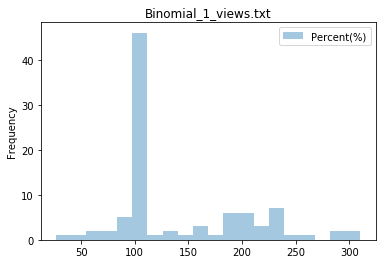

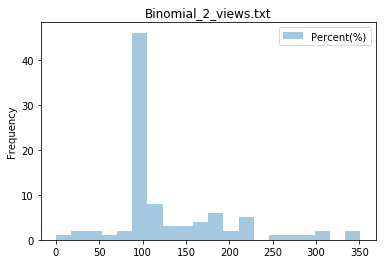

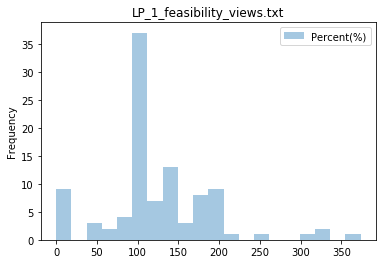

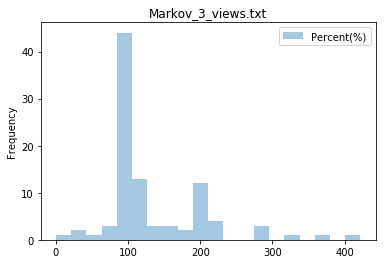

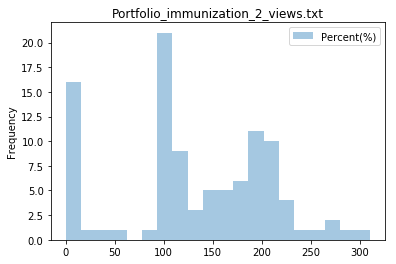

In [49]:
#7: #Thanks for code you provided Lol

import matplotlib.pyplot as plt
%matplotlib inline 

for g,d in lectures[['Percent(%)','filename']].groupby('filename'): 
    d.plot.hist(bins=20, alpha=0.4, title=g)